In [2]:
!pip install seaborn



  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 1.4 MB/s eta 0:00:06
   --- ------------------------------------ 0.8/8.1 MB 1.3 MB/s eta 0:00:06
   --- ------------------------------------ 0.8/8.1 MB 1.3 MB/s eta 0:00:06
   ------ --------------------------------- 1.3/8.1 MB 1.2 MB/s eta 0:00:06
   ------- -------------------------------- 1.6/8.1 MB 1.2 MB/s eta 0:00:06
   --------- ------------------------------ 1.8/8.1 MB 1.2 MB/s eta 0:00:06
   ---------- ----------------------------- 2.1/8.1 MB 1.2 MB/s eta 0:00:05
   ----------- -

In [7]:
# ===============================
# 1. Import Libraries
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# For inline plots
%matplotlib inline

# ===============================
# 2. Load Dataset
# ===============================
df = pd.read_csv(r"C:\Users\Raji_kabilan\OneDrive\Desktop\infosys\set.csv")
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (4048, 116)


P_NAME  P_STATUS      P_MASS  P_MASS_ERROR_MIN  P_MASS_ERROR_MAX  \
0    11 Com b         3  6165.86330        -476.74200         476.74200   
1    11 UMi b         3  4684.78480        -794.57001         794.57001   
2    14 And b         3  1525.57440               NaN               NaN   
3    14 Her b         3  1481.07850         -47.67420          47.67420   
4  16 Cyg B b         3   565.73385         -25.42624          25.42624   

   P_RADIUS  P_RADIUS_ERROR_MIN  P_RADIUS_ERROR_MAX  P_YEAR   P_UPDATED  ...  \
0       NaN                 NaN                 NaN    2007  14-05-2014  ...   
1       NaN                 NaN                 NaN    2009  06-09-2018  ...   
2       NaN                 NaN                 NaN    2008  14-05-2014  ...   
3       NaN                 NaN                 NaN    2002  06-09-2018  ...   
4       NaN                 NaN                 NaN    1996  06-09-2018  ...   

   S_CONSTELLATION  S_CONSTELLATION_ABR  S_CONSTELLATION_ENG  P_RADIUS_EST  \
0   Coma Berenices                  Com      Berenice's Hair     12.082709   
1       Ursa Minor                  UMi          Little Bear     12.229641   
2        Andromeda                  And            Andromeda     12.848516   
3         Hercules                  Her             Hercules     12.865261   
4           Cygnus                  Cyg                 Swan     13.421749   

   P_MASS_EST  P_SEMI_MAJOR_AXIS_EST  Unnamed: 112  Unnamed: 113  \
0  6165.86330                   1.29           NaN           NaN   
1  4684.78480                   1.53           NaN           NaN   
2  1525.57440                   0.83           NaN           NaN   
3  1481.07850                   2.93           NaN           NaN   
4   565.73385                   1.66           NaN           NaN   

   Unnamed: 114  Unnamed: 115  
0           NaN           NaN  
1           NaN           NaN  
2           NaN           NaN  
3           NaN           NaN  
4           NaN           NaN  

[5 rows x 116 columns]

In [8]:
# ===============================
# 3. Feature Overview & Metadata
# ===============================

# Feature types
print("=== Feature Types ===")
print(df.dtypes)

# Number of unique values per column
print("\n=== Unique Values per Column ===")
print(df.nunique())

# Numeric descriptive statistics
num_cols = df.select_dtypes(include=['int64','float64']).columns
num_cols = num_cols.drop('P_HABITABLE', errors='ignore')  # exclude target

print("\n=== Numeric Features Descriptive Stats ===")
display(df[num_cols].describe())

# Categorical descriptive statistics
cat_cols = df.select_dtypes(include='object').columns
print("\n=== Categorical Features Descriptive Stats ===")
display(df[cat_cols].describe())

# Optional: display units (if available)
feature_units = {
    'P_RADIUS': 'Earth radii',
    'P_MASS': 'Earth mass',
    'P_PERIOD': 'days',
    'P_HABITABLE': 'binary'
}
print("\nFeature Units (if applicable):", feature_units)


=== Feature Types ===
P_NAME                    object
P_STATUS                   int64
P_MASS                   float64
P_MASS_ERROR_MIN         float64
P_MASS_ERROR_MAX         float64
                          ...   
P_SEMI_MAJOR_AXIS_EST    float64
Unnamed: 112             float64
Unnamed: 113             float64
Unnamed: 114             float64
Unnamed: 115             float64
Length: 116, dtype: object

=== Unique Values per Column ===
P_NAME                   4048
P_STATUS                    1
P_MASS                   1080
P_MASS_ERROR_MIN          473
P_MASS_ERROR_MAX          474
                         ... 
P_SEMI_MAJOR_AXIS_EST    3020
Unnamed: 112                0
Unnamed: 113                0
Unnamed: 114                0
Unnamed: 115                1
Length: 116, dtype: int64

=== Numeric Features Descriptive Stats ===


P_STATUS        P_MASS  P_MASS_ERROR_MIN  P_MASS_ERROR_MAX  \
count    4048.0   1598.000000       1467.000000       1467.000000   
mean        3.0    798.384920       -152.292232        190.289692   
std         0.0   1406.808654        783.366353       1082.061976   
min         3.0      0.019070     -24965.390000          0.000000   
25%         3.0     26.548968        -79.457001          4.449592   
50%         3.0    273.332080        -24.154928         25.108412   
75%         3.0    806.488560         -4.392383         85.813561   
max         3.0  17668.059000          0.270000      26630.808000   

          P_RADIUS  P_RADIUS_ERROR_MIN  P_RADIUS_ERROR_MAX       P_YEAR  \
count  3139.000000         3105.000000         3105.000000  4048.000000   
mean      4.191426           -0.483990            0.621867  2014.212945   
std       4.776830            1.409048            2.007592     3.704839   
min       0.336300          -54.592700            0.000000  1989.000000   
25%       1.569400           -0.526870            0.145730  2014.000000   
50%       2.331680           -0.235410            0.325090  2016.000000   
75%       3.553570           -0.134520            0.661390  2016.000000   
max      77.349000            0.450000           68.919080  2019.000000   

           P_PERIOD  P_PERIOD_ERROR_MIN  ...  P_HABZONE_OPT  P_HABZONE_CON  \
count  3.938000e+03        3.807000e+03  ...    4048.000000    4048.000000   
mean   2.309342e+03       -1.073631e+03  ...       0.049654       0.034091   
std    1.167012e+05        5.943181e+04  ...       0.217256       0.181485   
min    9.070629e-02       -3.650000e+06  ...       0.000000       0.000000   
25%    4.497336e+00       -1.129000e-03  ...       0.000000       0.000000   
50%    1.187053e+01       -9.390000e-05  ...       0.000000       0.000000   
75%    4.186661e+01       -1.595000e-05  ...       0.000000       0.000000   
max    7.300000e+06        3.200000e-02  ...       1.000000       1.000000   

             P_ESI  P_RADIUS_EST    P_MASS_EST  P_SEMI_MAJOR_AXIS_EST  \
count  3721.000000   4048.000000   4048.000000            3978.000000   
mean      0.261252      5.588647    323.089993               4.011385   
std       0.131333      5.392733    965.084290              62.389968   
min       0.006768      0.000000      0.000000               0.004400   
25%       0.196982      1.703920      3.628101               0.053000   
50%       0.271192      2.667980      7.815324               0.102199   
75%       0.303346     11.770500    149.379160               0.260507   
max       0.931208     77.349000  17668.059000            2500.000000   

       Unnamed: 112  Unnamed: 113  Unnamed: 114  Unnamed: 115  
count           0.0           0.0           0.0           1.0  
mean            NaN           NaN           NaN          34.0  
std             NaN           NaN           NaN           NaN  
min             NaN           NaN           NaN          34.0  
25%             NaN           NaN           NaN          34.0  
50%             NaN           NaN           NaN          34.0  
75%             NaN           NaN           NaN          34.0  
max             NaN           NaN           NaN          34.0  

[8 rows x 100 columns]


=== Categorical Features Descriptive Stats ===


P_NAME   P_UPDATED P_DETECTION     S_NAME S_TYPE S_ALT_NAMES  \
count       4048        4048        4048       4048   1370        4048   
unique      4048         184          10       3010    210         584   
top     11 Com b  10-05-2016     Transit  Kepler-90   G0 V           ,   
freq           1        1282        3114          8     56        3269   

        P_TYPE S_TYPE_TEMP         S_RA_T         S_DEC_T S_TIDAL_LOCK  \
count     4031        3912           4048            4048         3283   
unique       6           7           3010            3010         1511   
top     Jovian           G  18 57 44.0416  +49 18 18.5796   0.45031054   
freq      1302        1792              8               8           25   

       P_TYPE_TEMP S_CONSTELLATION S_CONSTELLATION_ABR S_CONSTELLATION_ENG  
count         3721            4048                4048                4048  
unique           3              88                  88                  88  
top            Hot          Cygnus                 Cyg                Swan  
freq          3341            1371                1371                1371


Feature Units (if applicable): {'P_RADIUS': 'Earth radii', 'P_MASS': 'Earth mass', 'P_PERIOD': 'days', 'P_HABITABLE': 'binary'}



=== Missing Values Summary ===


Missing_Count  Missing_Percent
P_DETECTION_MASS              4048            100.0
P_DETECTION_RADIUS            4048            100.0
P_ALT_NAMES                   4048            100.0
P_GEO_ALBEDO                  4048            100.0
P_ATMOSPHERE                  4048            100.0
...                            ...              ...
P_HABZONE_CON                    0              0.0
P_HABZONE_OPT                    0              0.0
P_MASS_EST                       0              0.0
S_CONSTELLATION_ENG              0              0.0
P_RADIUS_EST                     0              0.0

[116 rows x 2 columns]

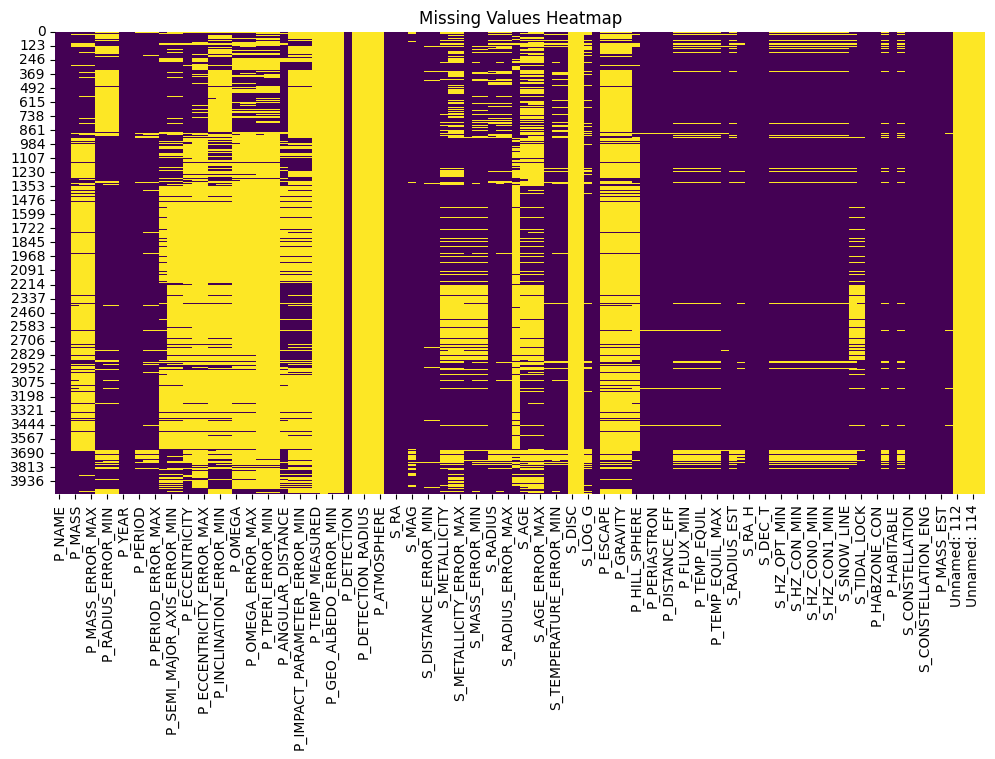

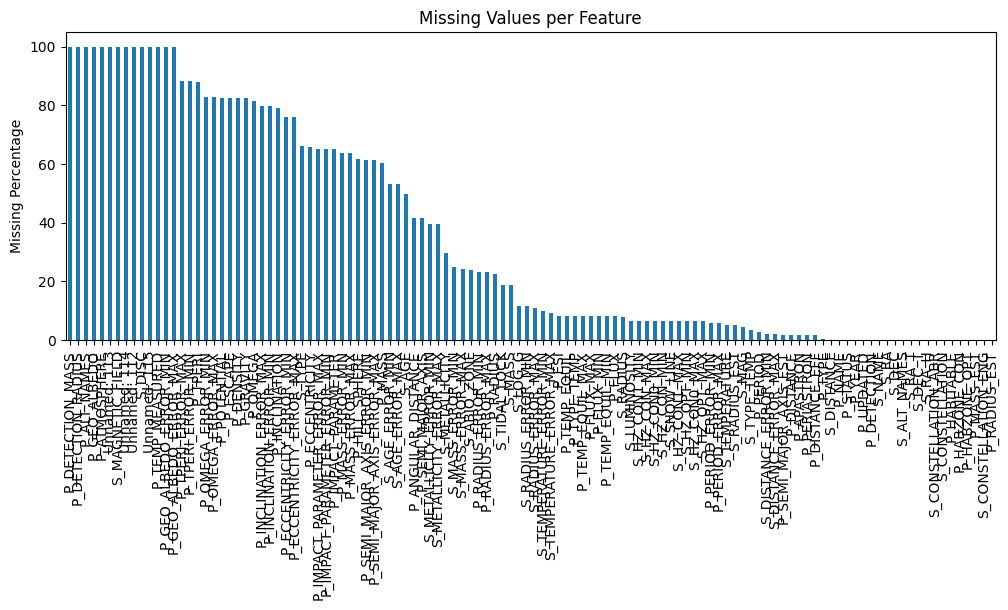

In [9]:
# ===============================
# 4. Missing Value Analysis
# ===============================

# Count of missing values
missing_count = df.isnull().sum()
# Percentage of missing values
missing_percent = df.isnull().mean() * 100

missing_summary = pd.DataFrame({
    'Missing_Count': missing_count,
    'Missing_Percent': missing_percent
}).sort_values(by='Missing_Percent', ascending=False)

print("\n=== Missing Values Summary ===")
display(missing_summary)

# Heatmap of missing values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Bar plot of missing percentages
plt.figure(figsize=(12,4))
missing_summary['Missing_Percent'].plot(kind='bar')
plt.ylabel("Missing Percentage")
plt.title("Missing Values per Feature")
plt.show()




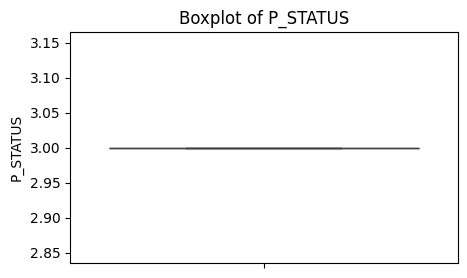

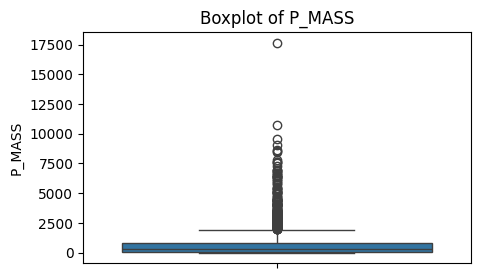

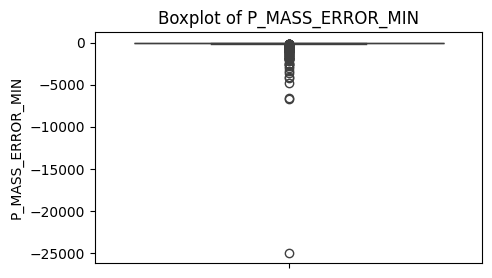

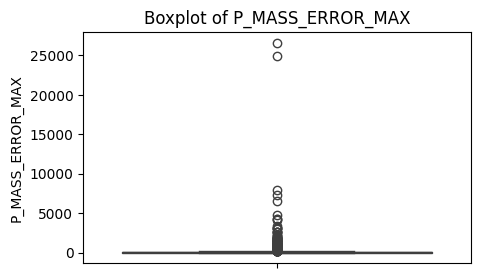

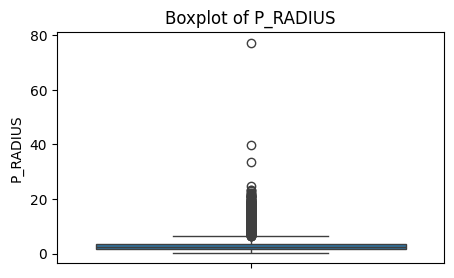

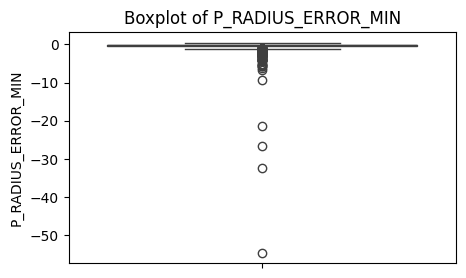

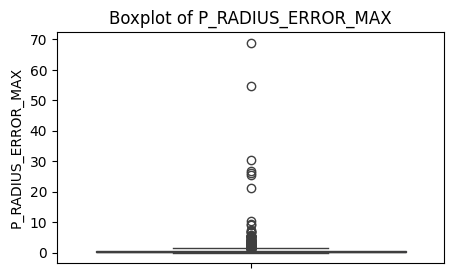

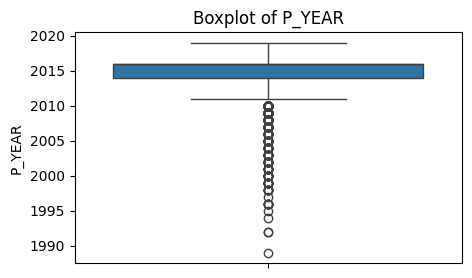

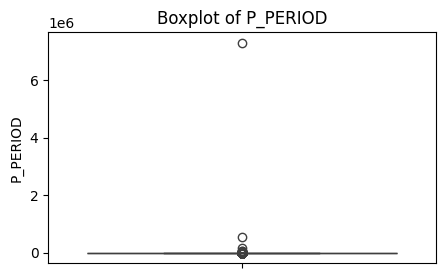

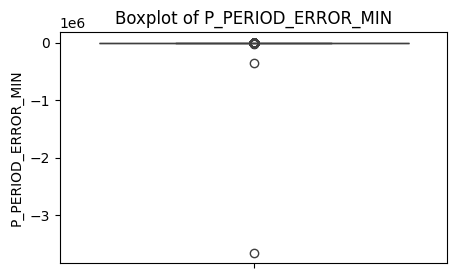

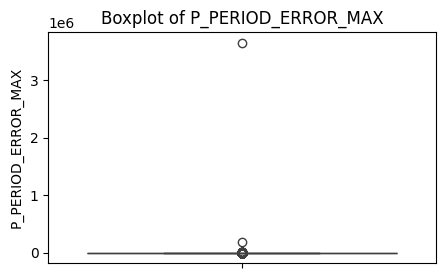

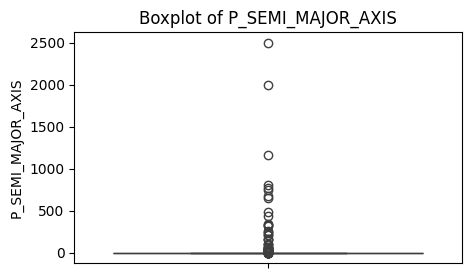

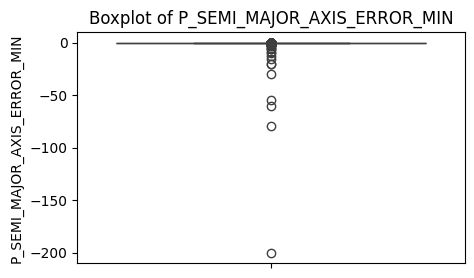

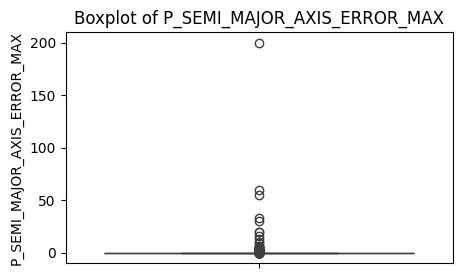

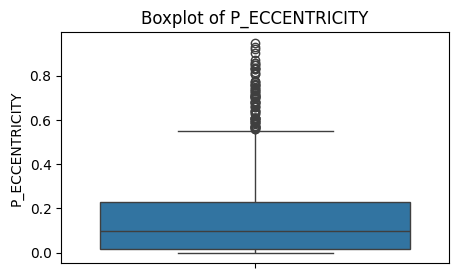

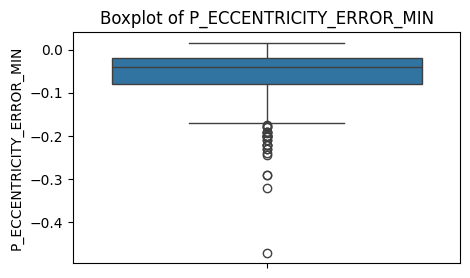

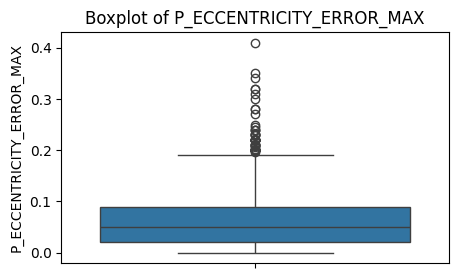

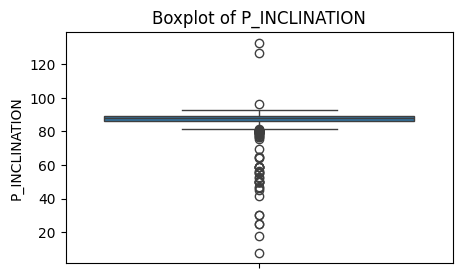

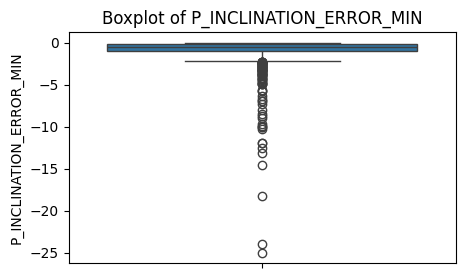

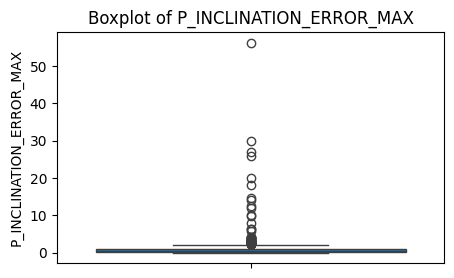

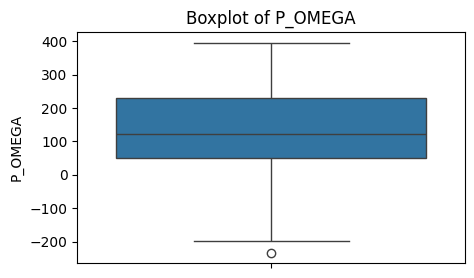

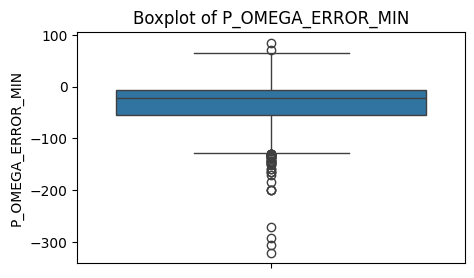

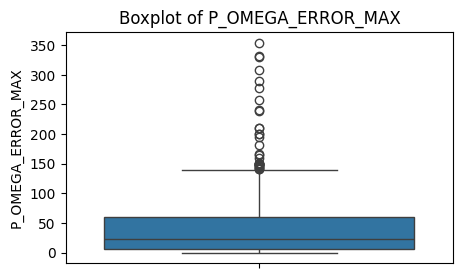

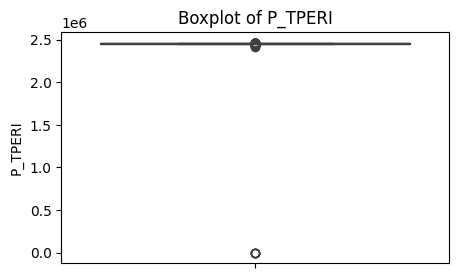

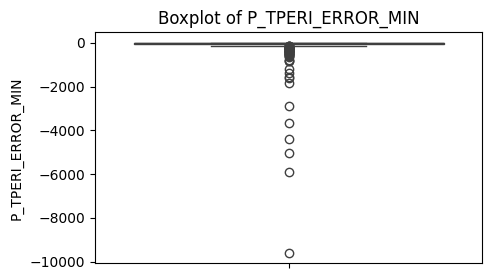

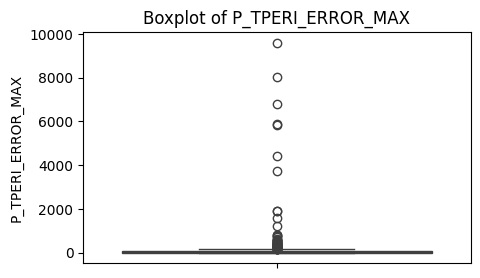

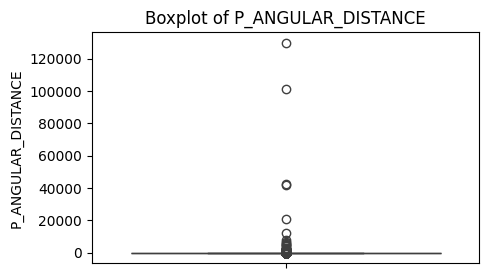

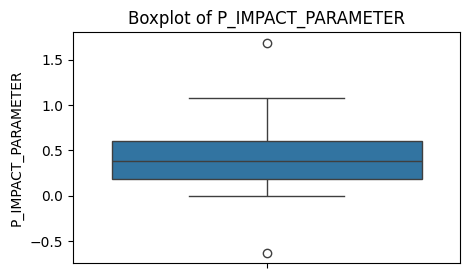

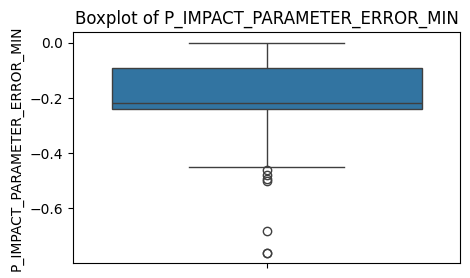

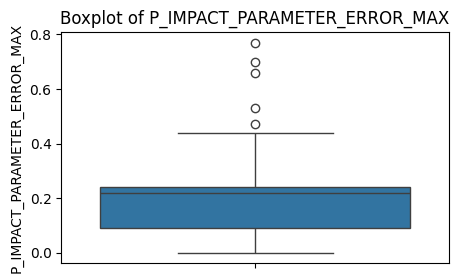

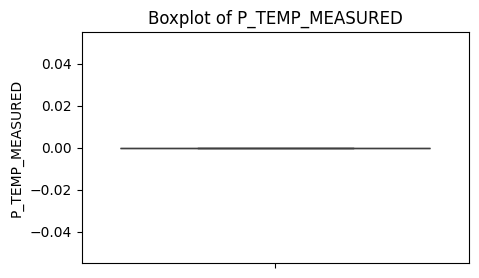

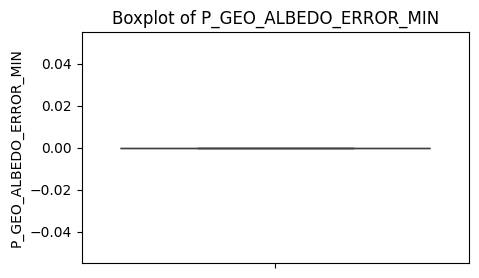

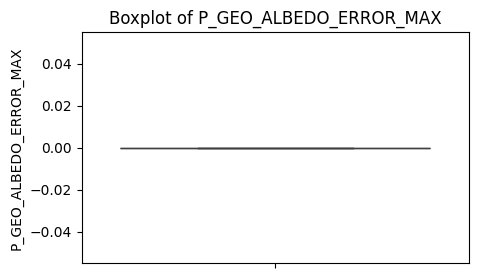

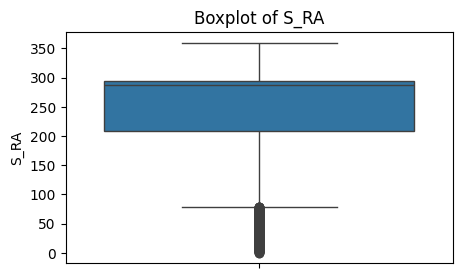

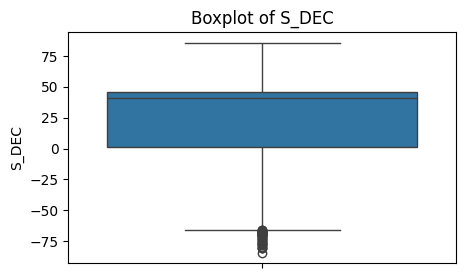

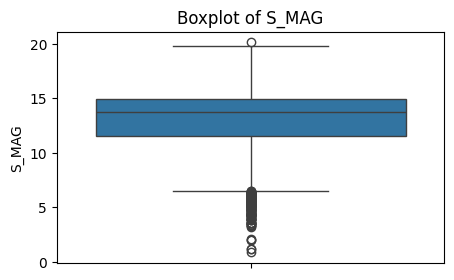

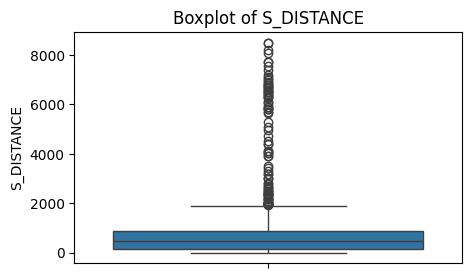

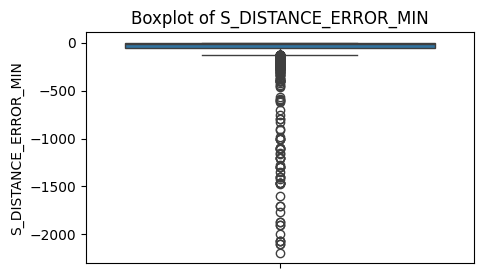

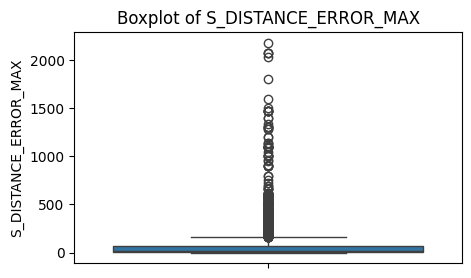

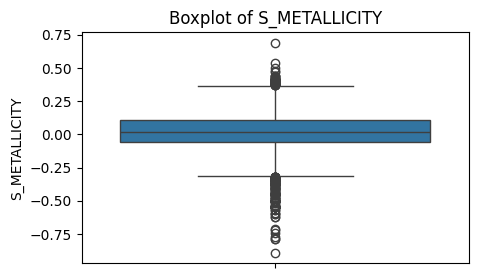

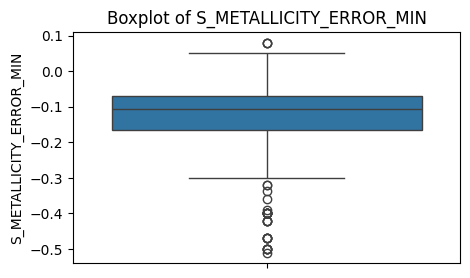

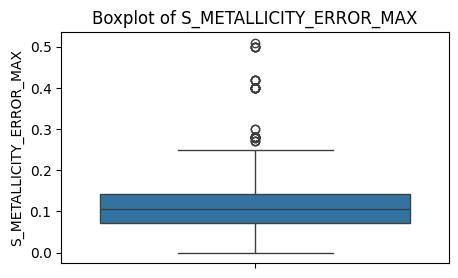

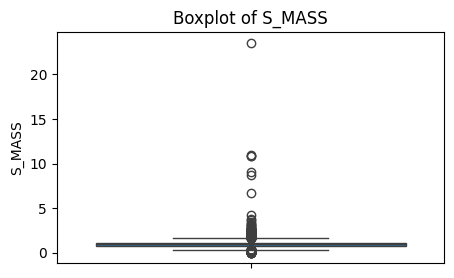

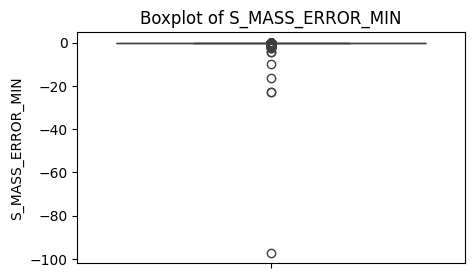

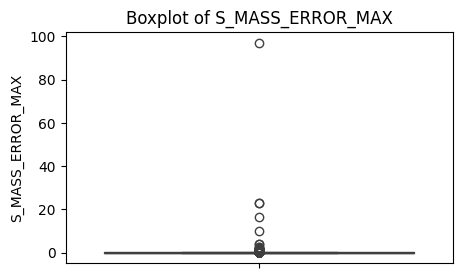

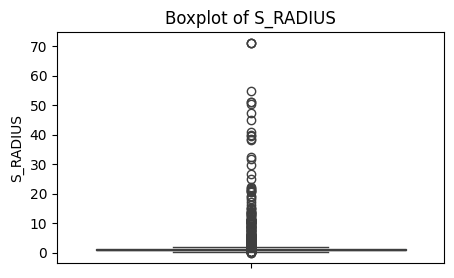

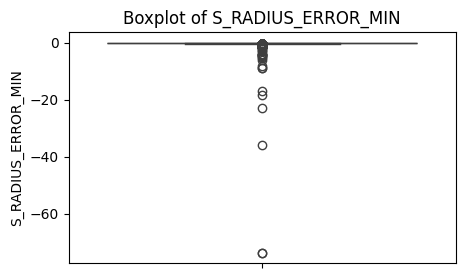

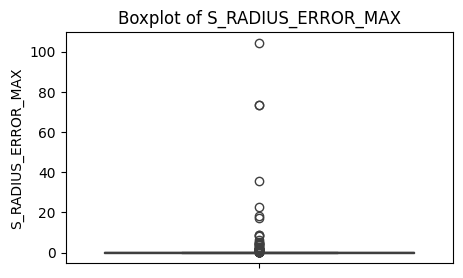

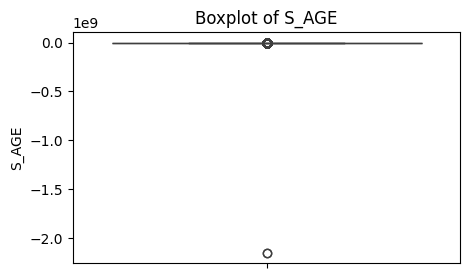

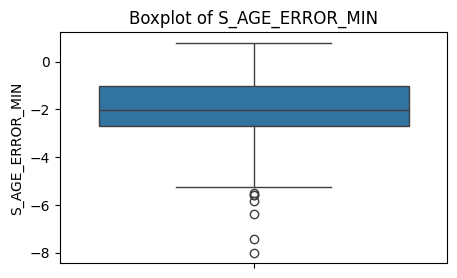

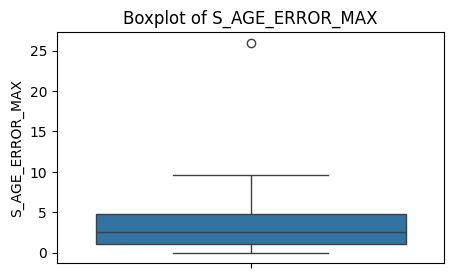

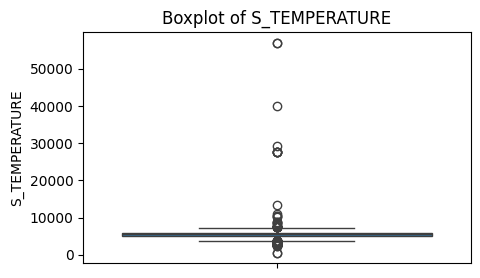

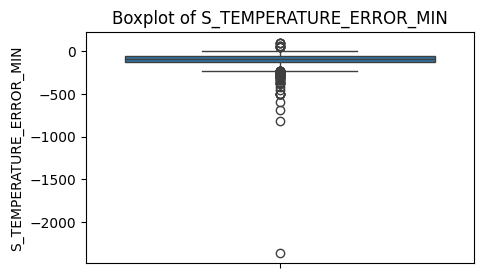

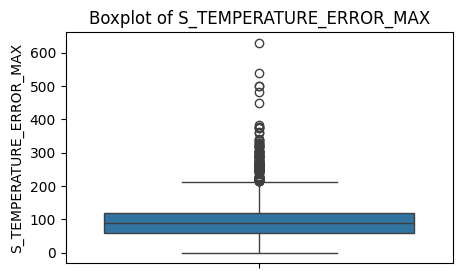

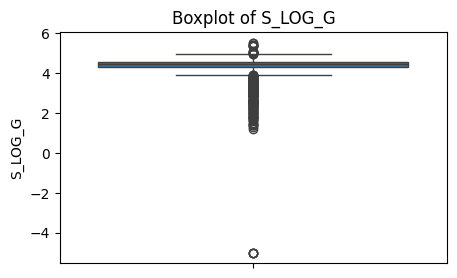

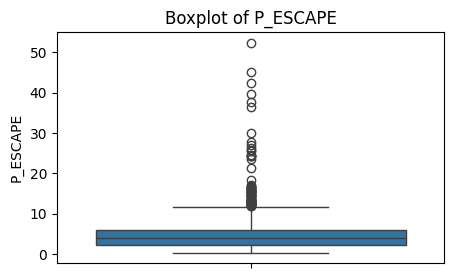

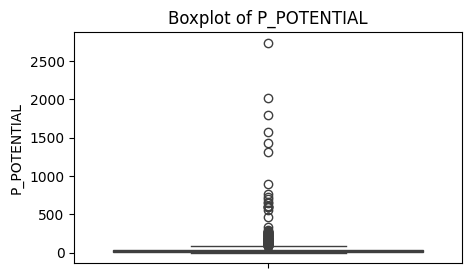

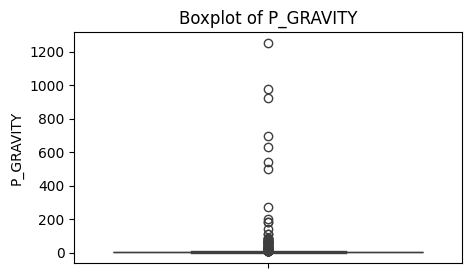

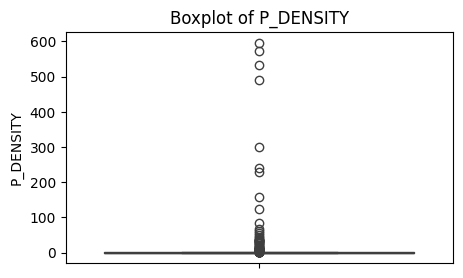

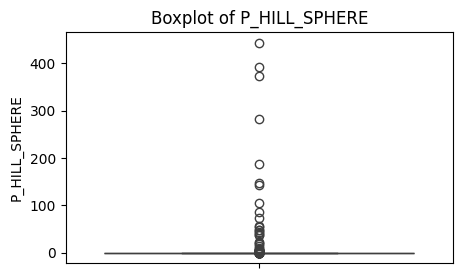

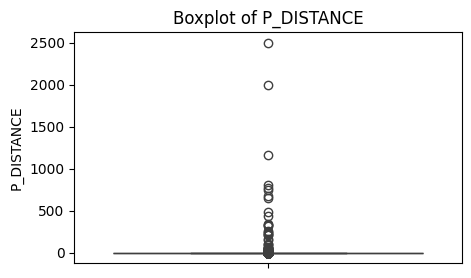

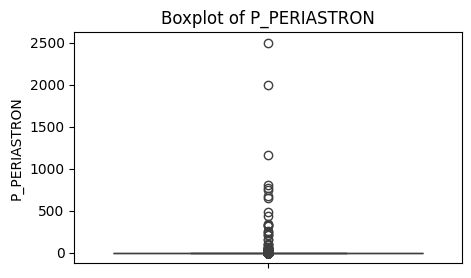

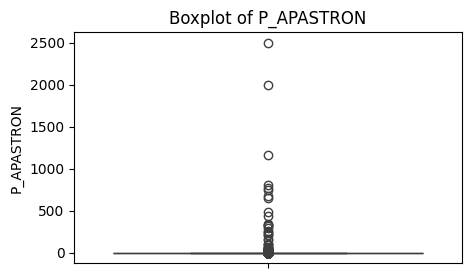

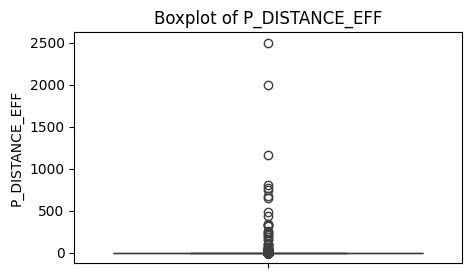

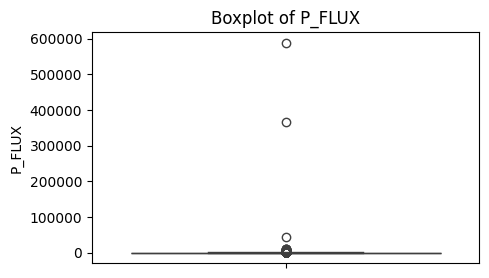

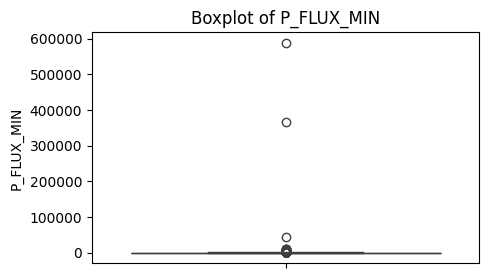

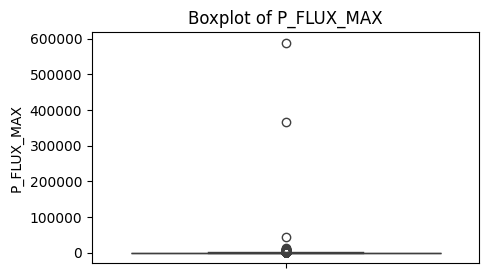

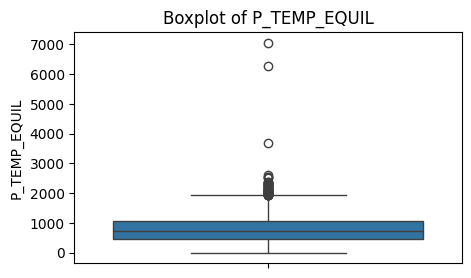

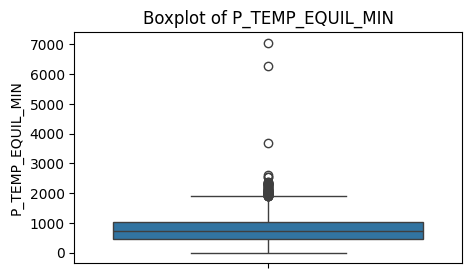

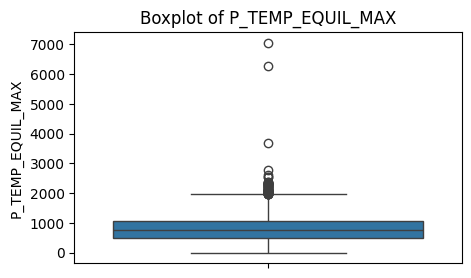

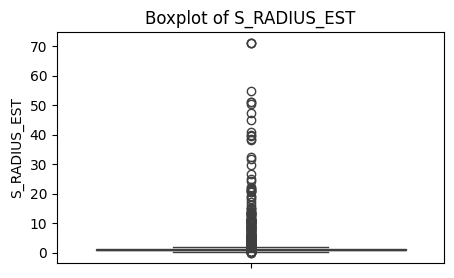

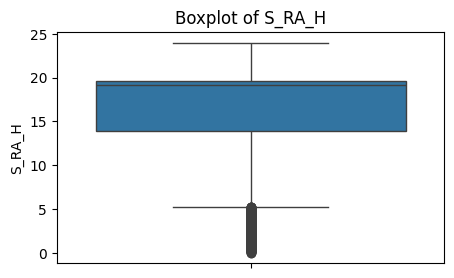

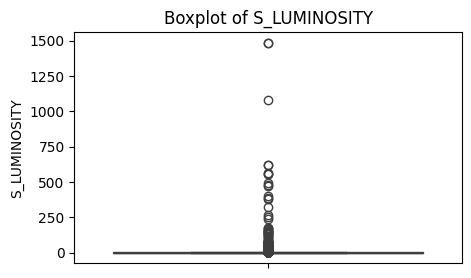

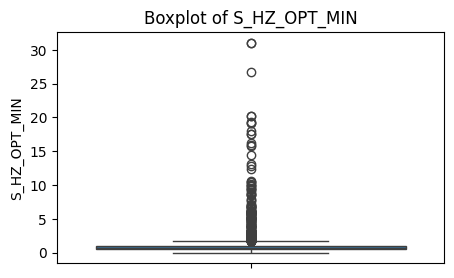

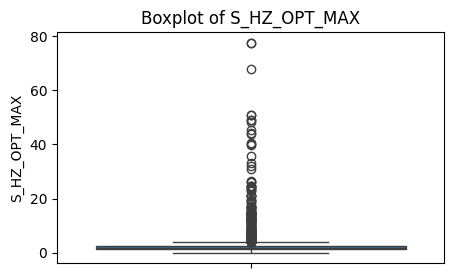

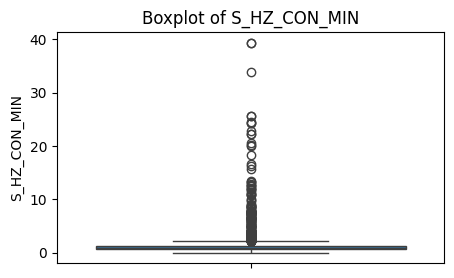

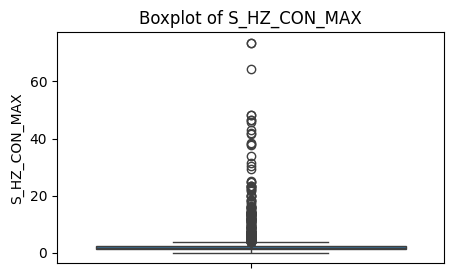

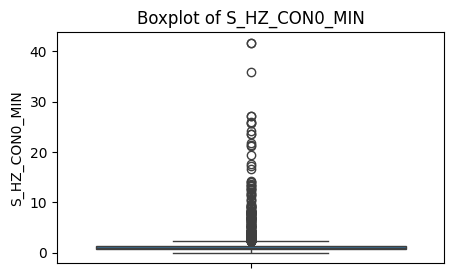

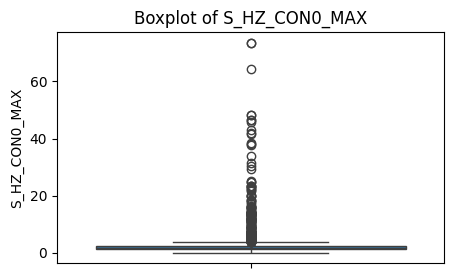

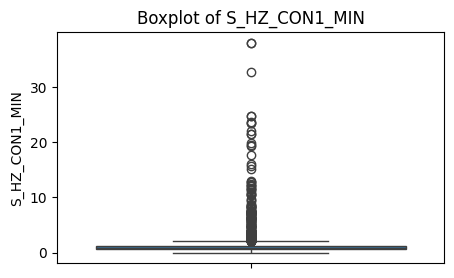

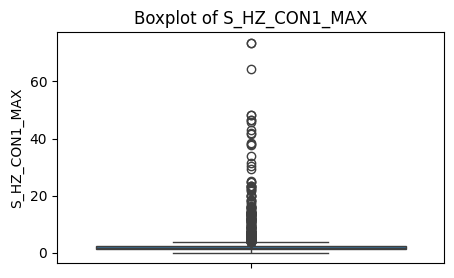

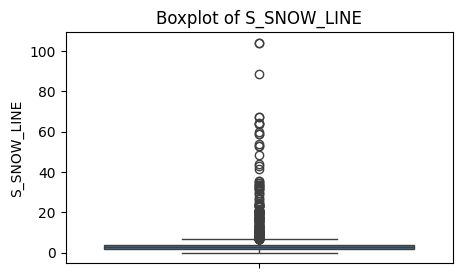

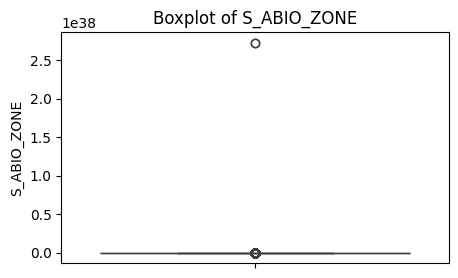

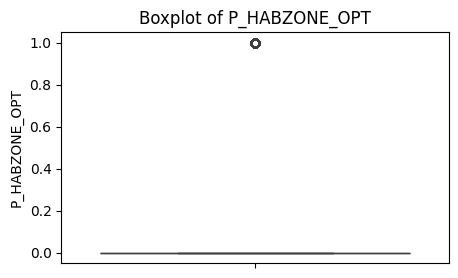

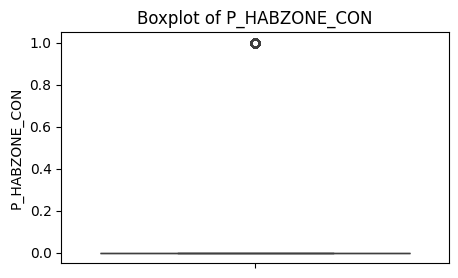

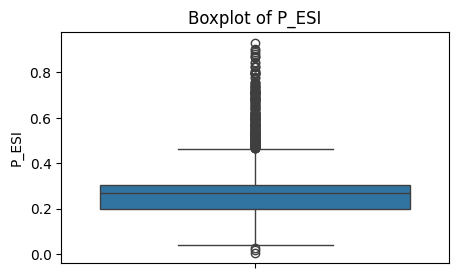

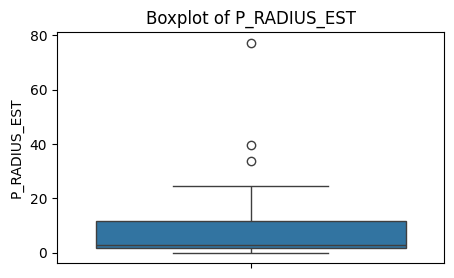

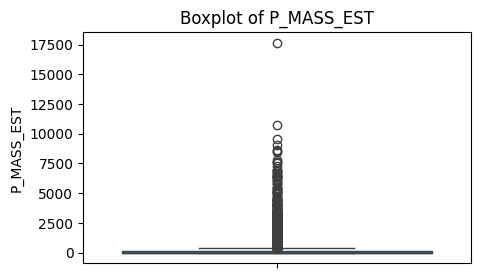

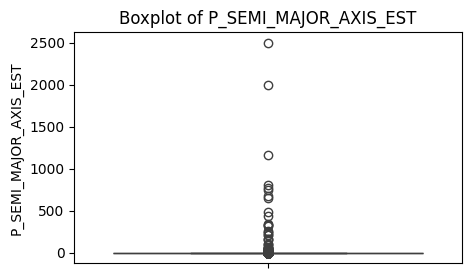

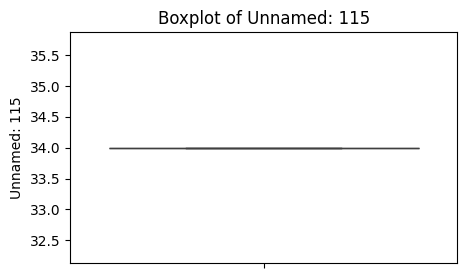


=== Outlier Summary (IQR Method) ===


Lower_Bound  Upper_Bound Outlier_Count
P_STATUS                       3.0          3.0             0
P_MASS                -1143.360421  1976.397948           198
P_MASS_ERROR_MIN       -192.053928   108.204544           194
P_MASS_ERROR_MAX       -117.596362   207.859515           197
P_RADIUS                 -1.406855     6.529825           559
...                            ...          ...           ...
P_SEMI_MAJOR_AXIS_EST     -0.25826     0.571767           678
Unnamed: 112                   NaN          NaN             0
Unnamed: 113                   NaN          NaN             0
Unnamed: 114                   NaN          NaN             0
Unnamed: 115                  34.0         34.0             0

[100 rows x 3 columns]

In [11]:
# ===============================
# 5. Outlier Detection (Boxplots & IQR)
# ===============================

# Ensure numeric columns only
num_cols = df.select_dtypes(include=['int64','float64']).columns
num_cols = num_cols.drop('P_HABITABLE', errors='ignore')  # exclude target

# Boxplots for numeric features
for col in num_cols:
    numeric_col = pd.to_numeric(df[col], errors='coerce')
    if numeric_col.notnull().sum() > 0:  # skip if all NaN
        plt.figure(figsize=(5,3))
        sns.boxplot(y=numeric_col)
        plt.title(f'Boxplot of {col}')
        plt.show()

# IQR-based outlier summary
outlier_summary = pd.DataFrame(index=num_cols, columns=['Lower_Bound','Upper_Bound','Outlier_Count'])

for col in num_cols:
    numeric_col = pd.to_numeric(df[col], errors='coerce')
    Q1 = numeric_col.quantile(0.25)
    Q3 = numeric_col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_count = numeric_col[(numeric_col < lower) | (numeric_col > upper)].count()
    outlier_summary.loc[col] = [lower, upper, outlier_count]

print("\n=== Outlier Summary (IQR Method) ===")
display(outlier_summary)


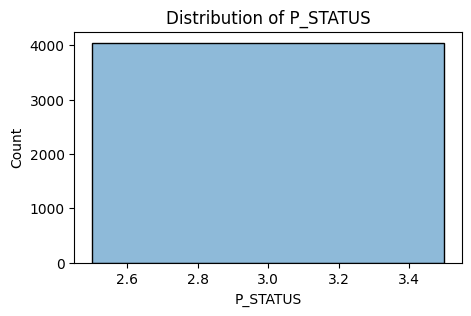

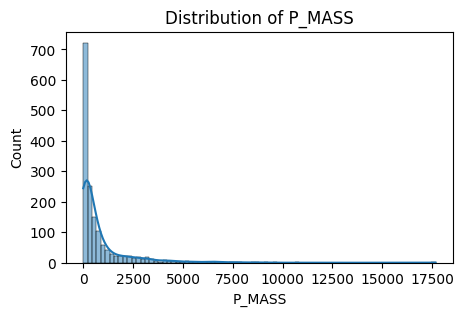

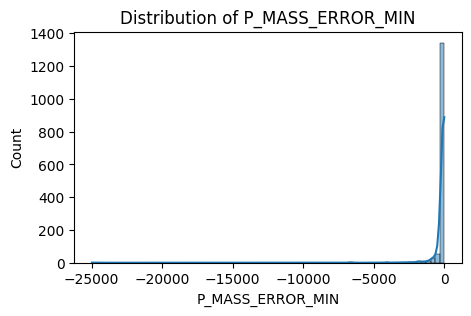

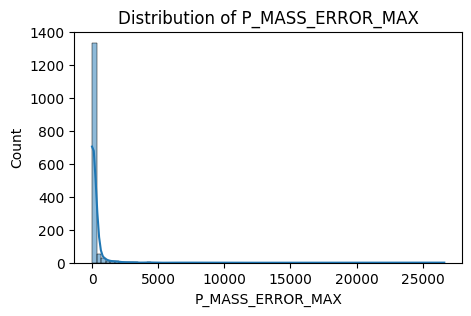

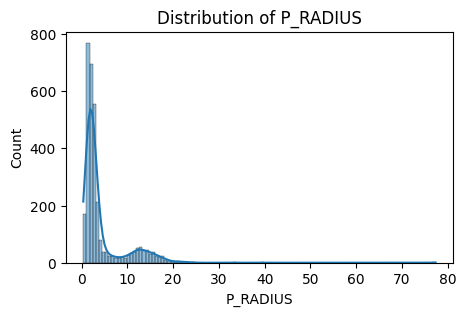

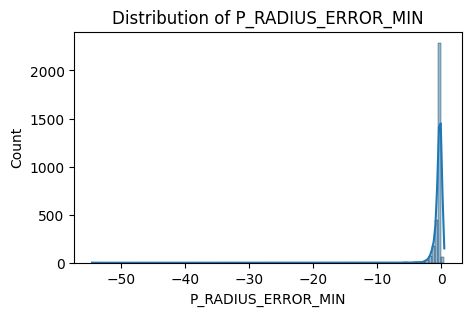

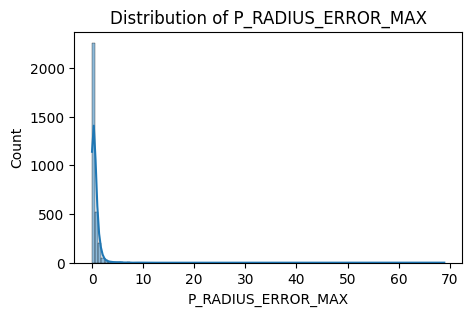

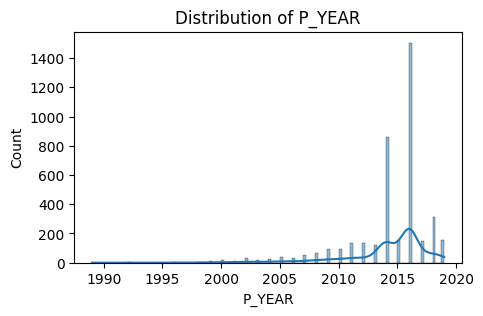

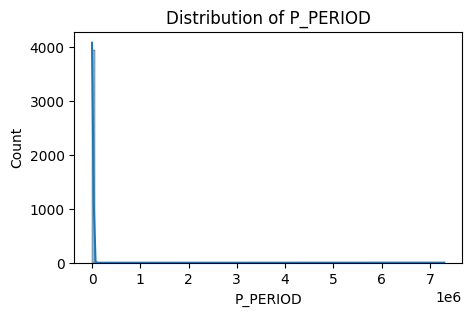

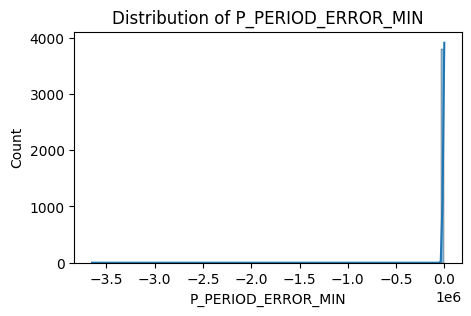

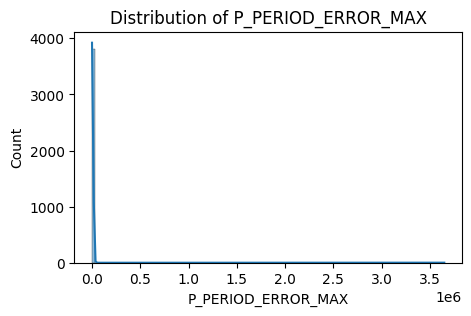

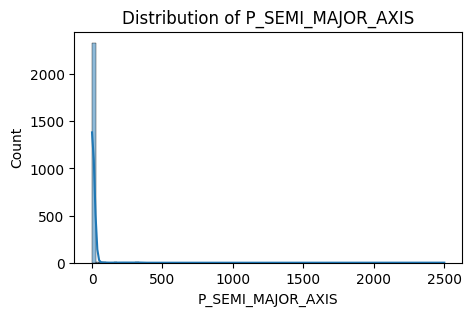

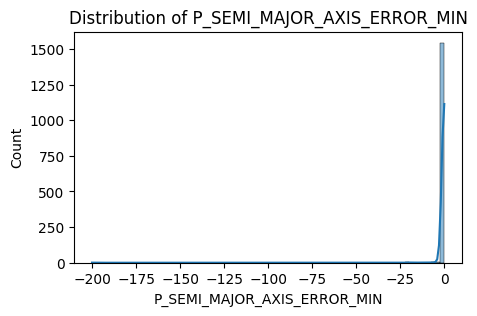

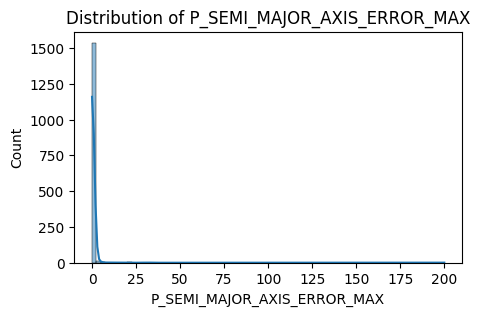

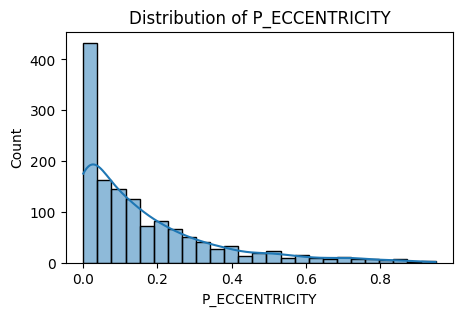

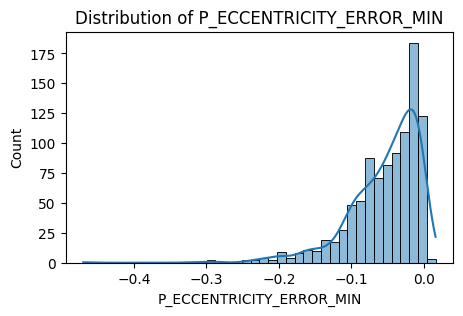

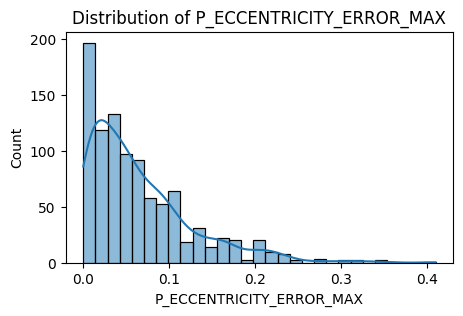

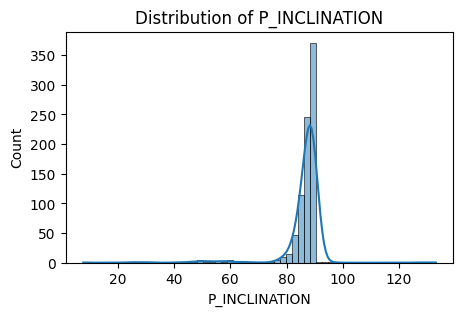

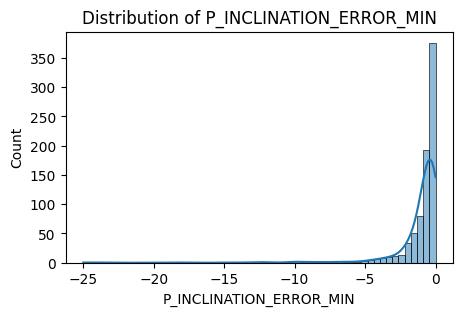

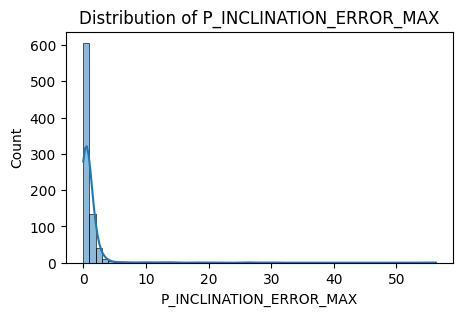

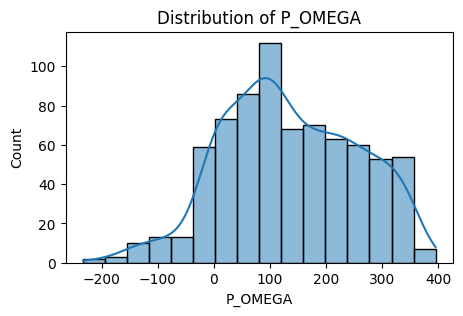

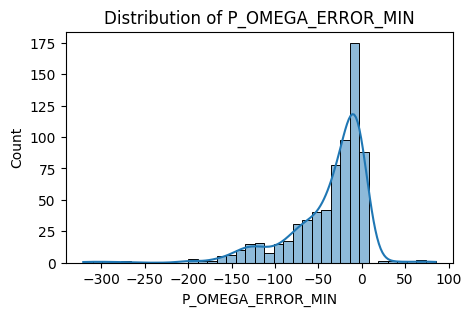

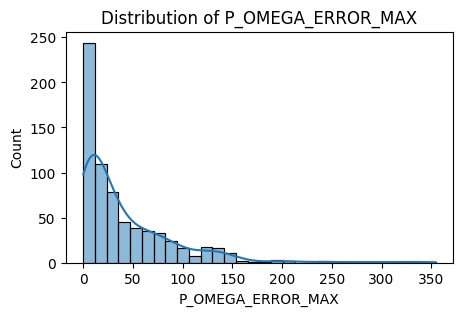

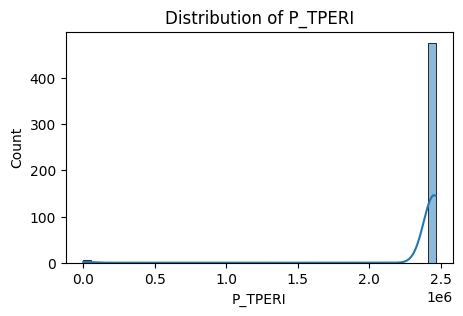

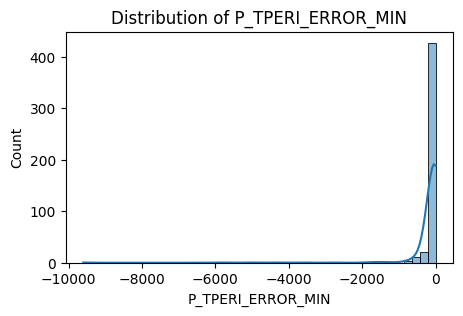

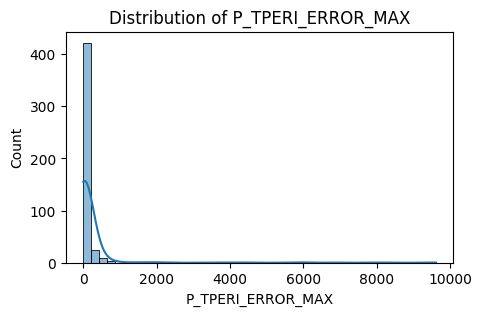

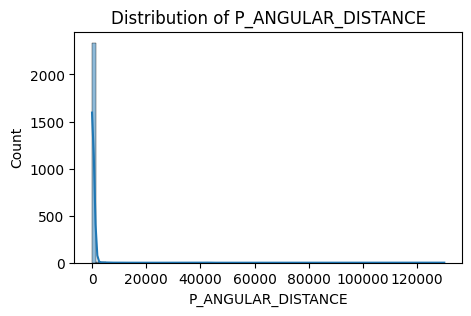

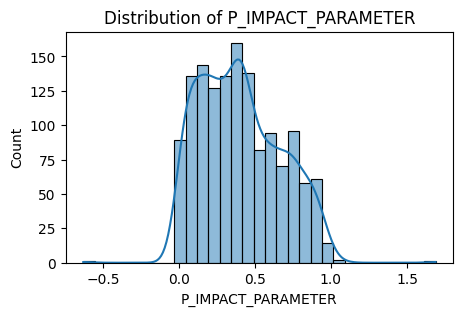

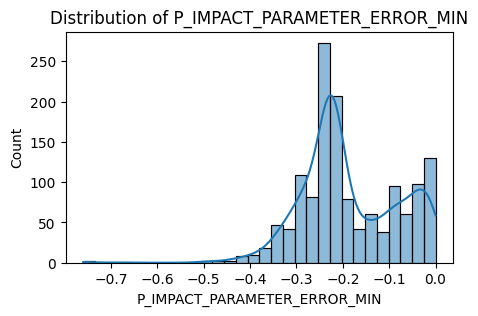

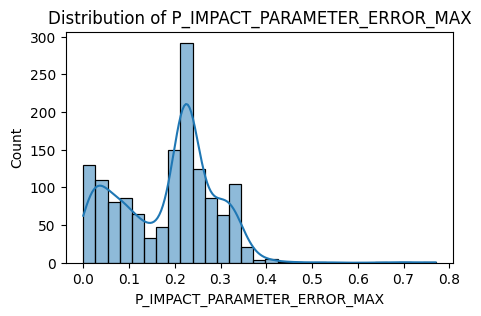

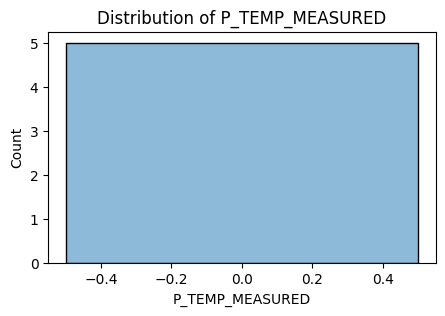

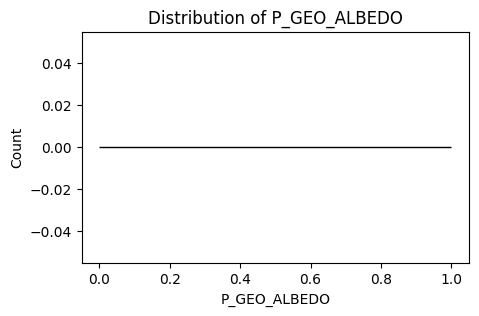

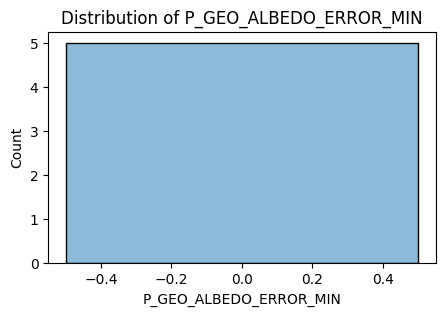

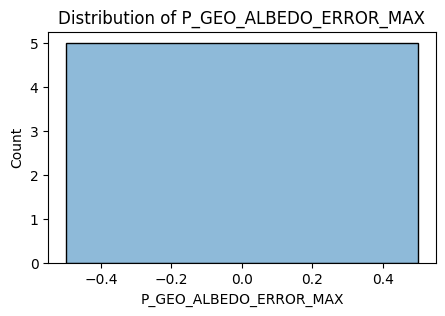

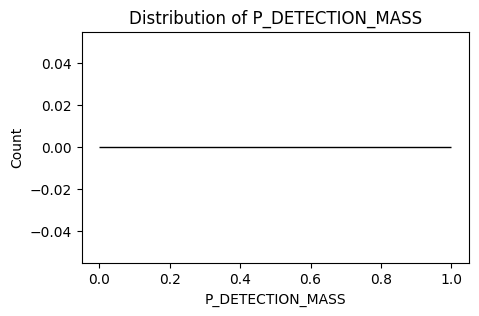

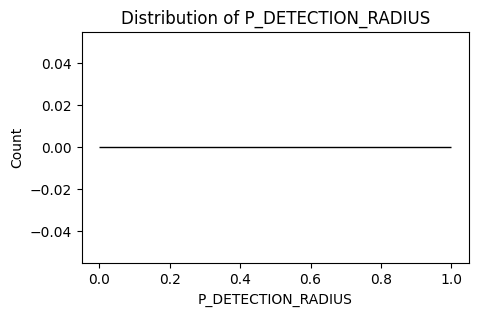

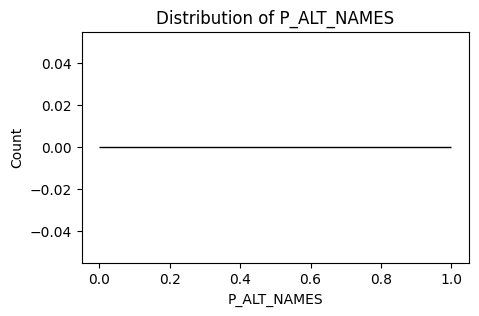

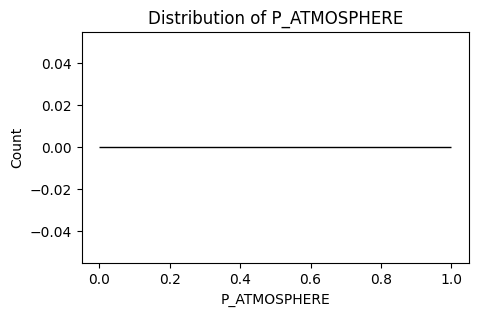

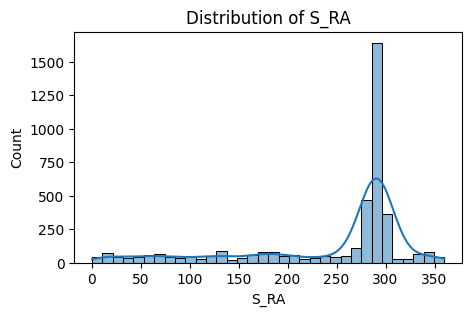

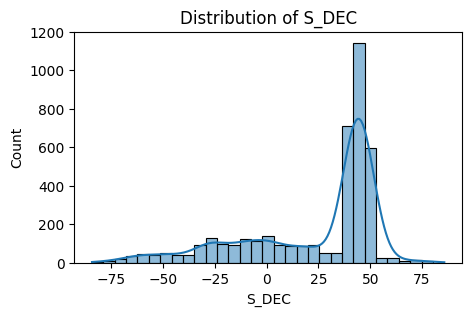

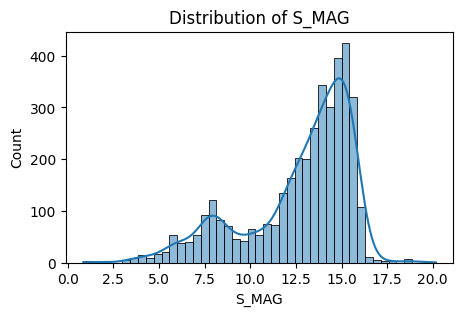

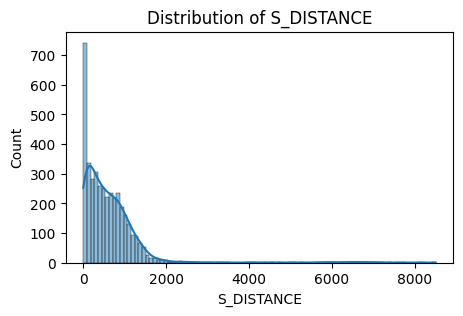

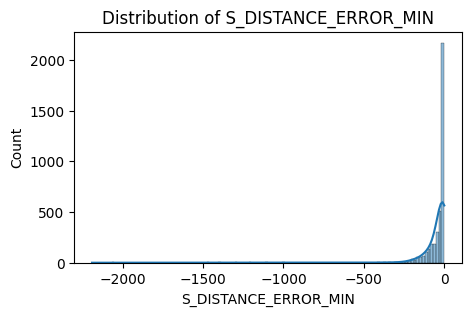

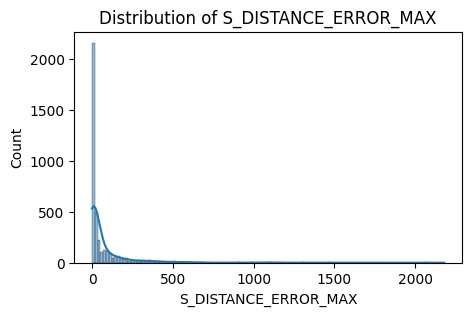

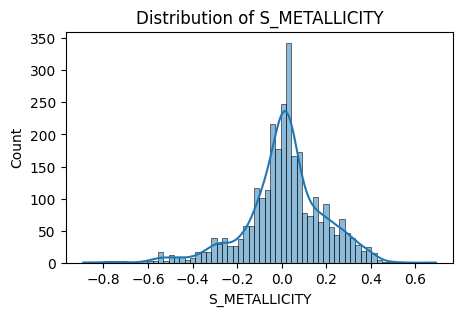

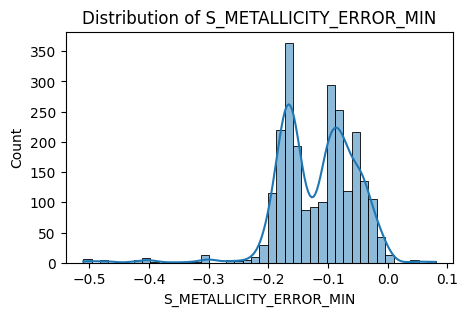

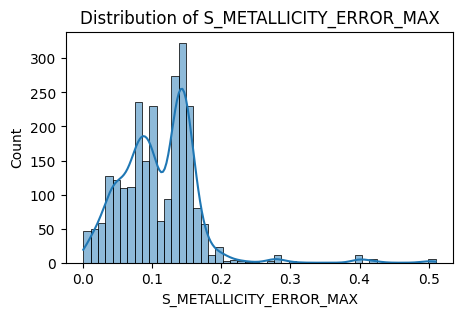

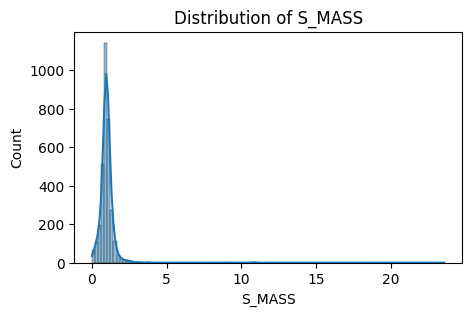

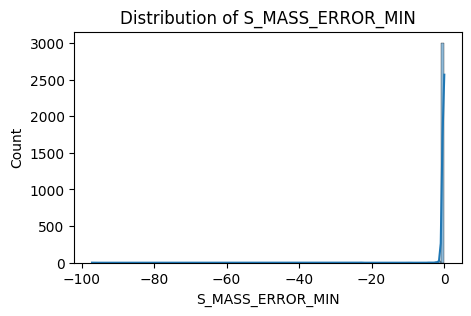

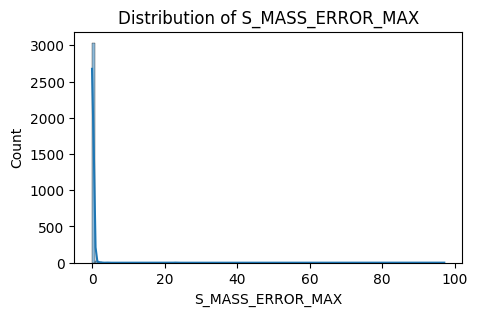

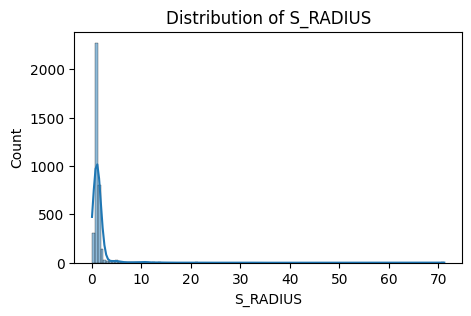

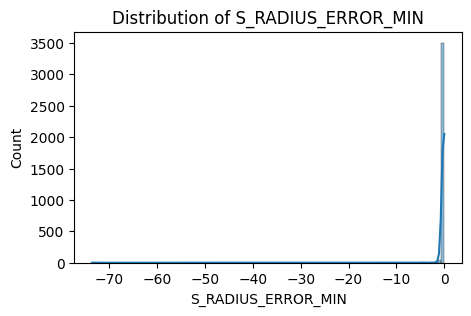

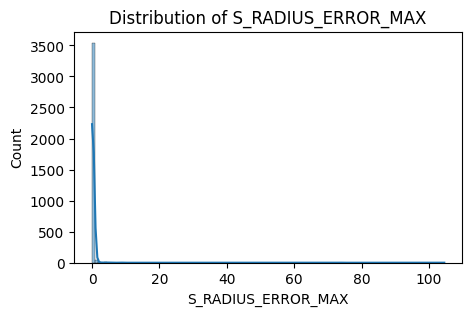

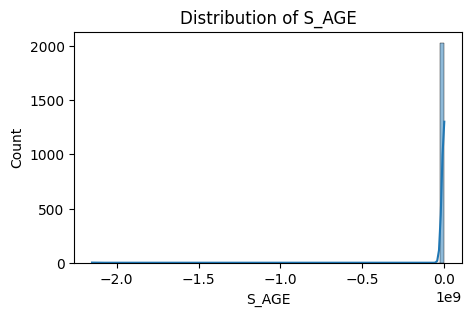

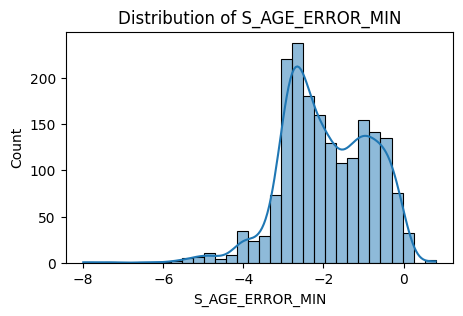

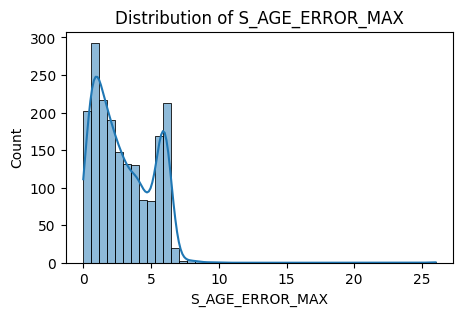

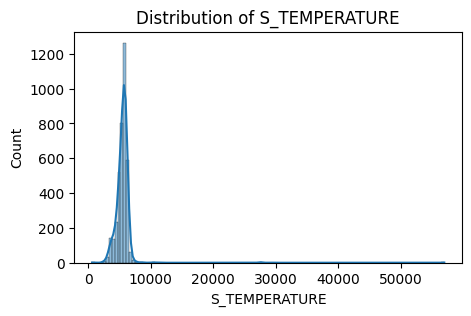

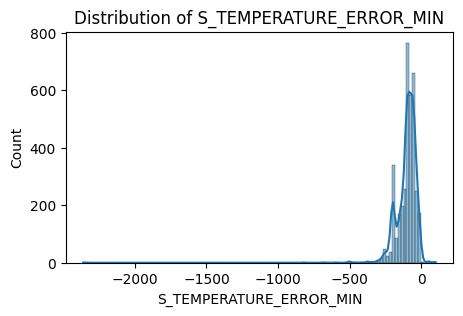

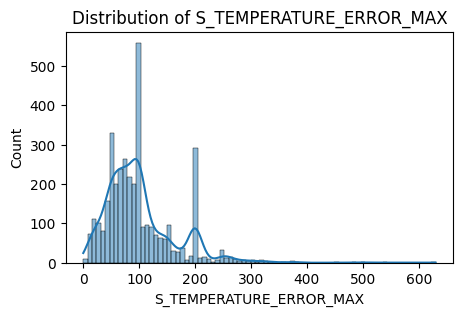

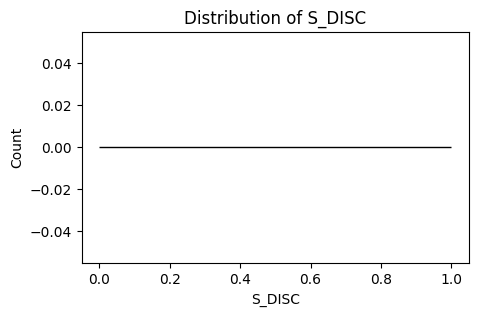

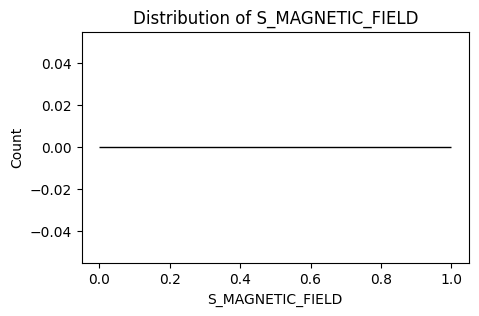

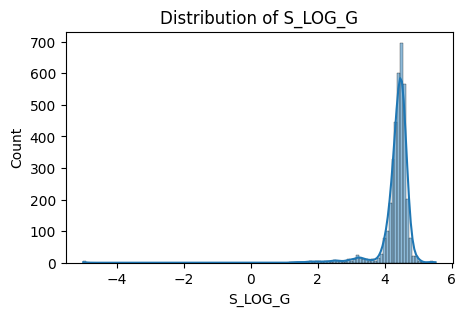

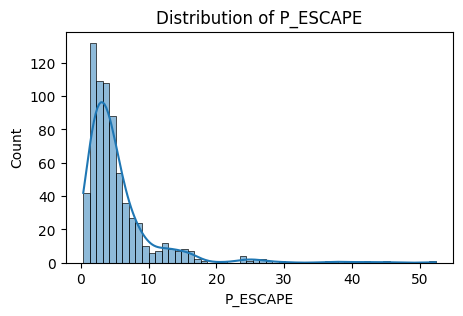

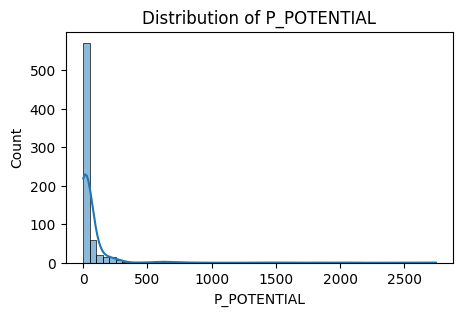

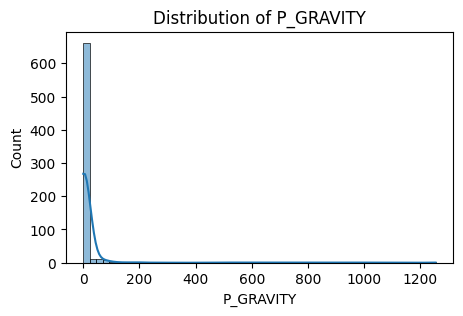

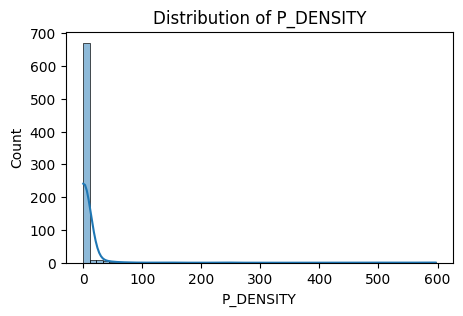

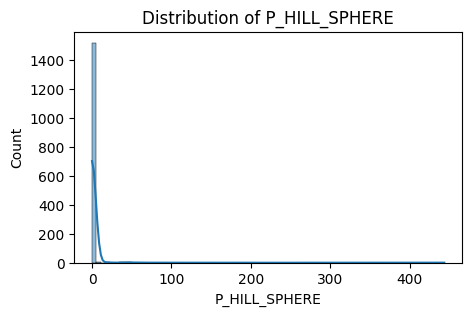

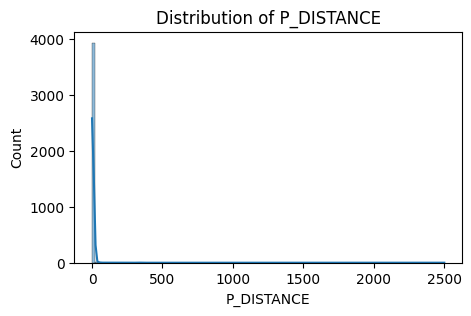

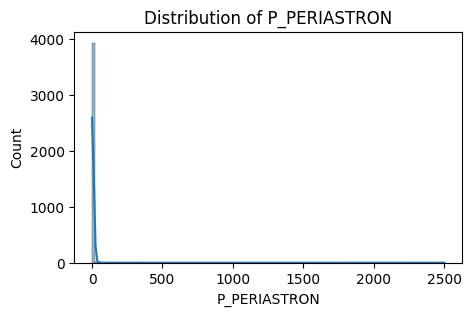

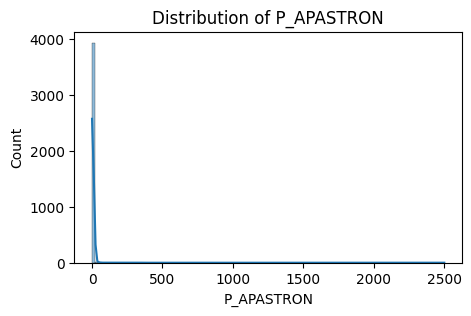

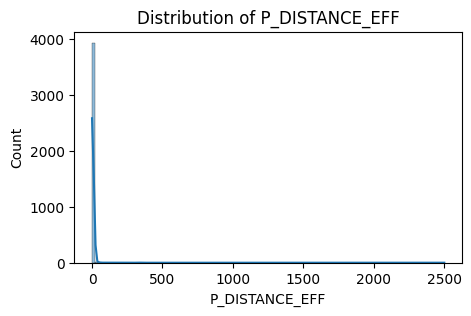

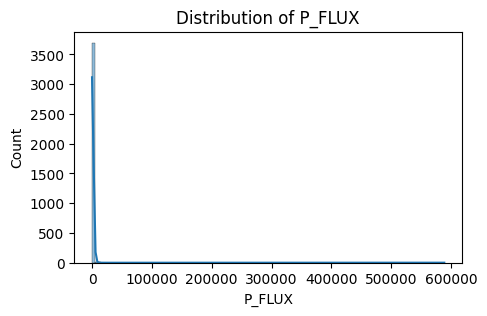

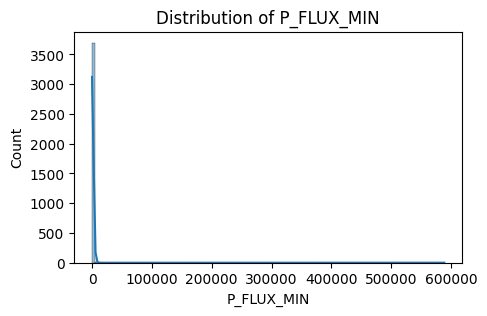

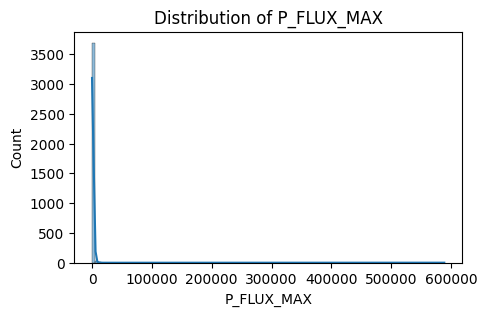

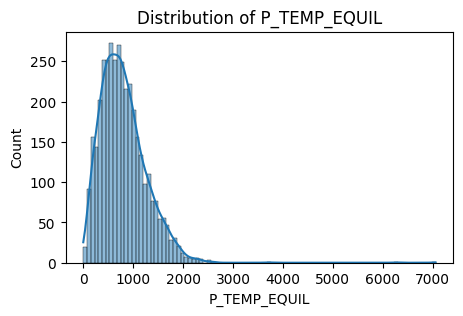

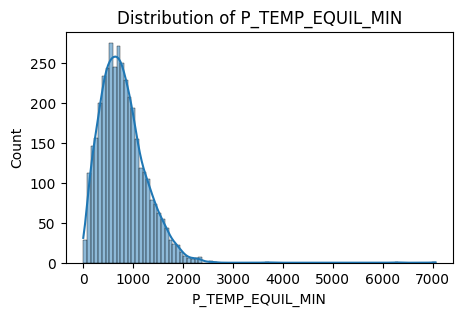

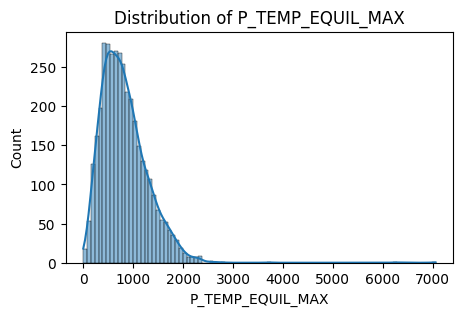

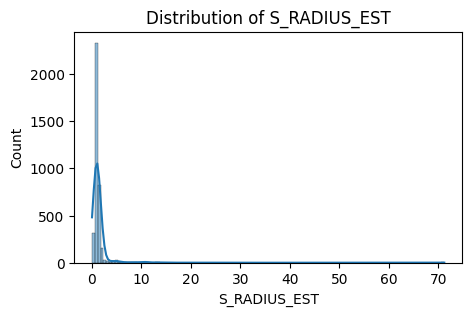

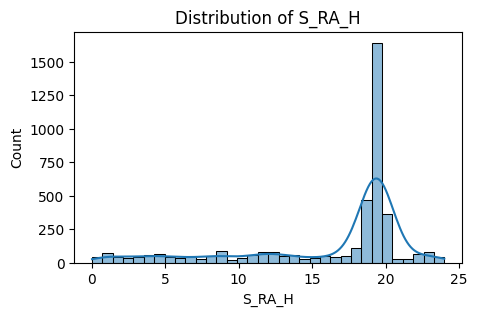

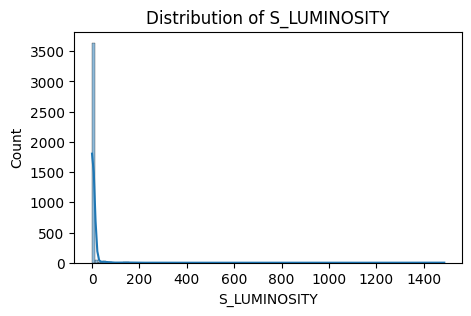

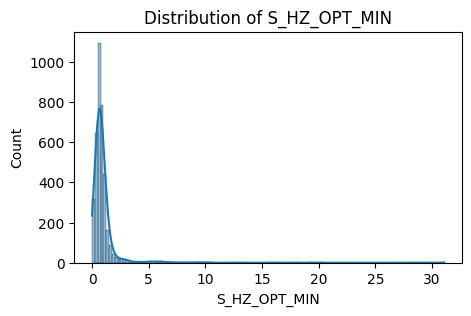

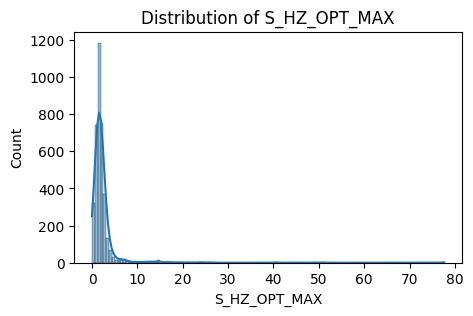

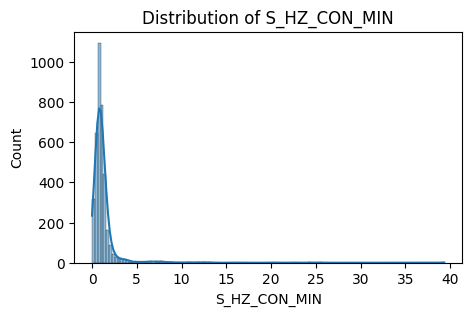

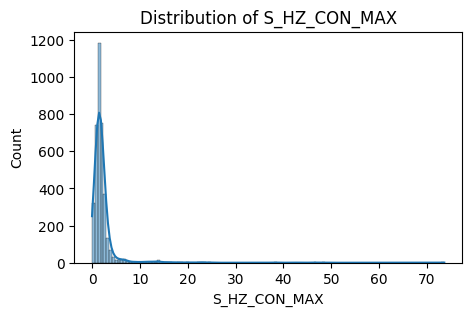

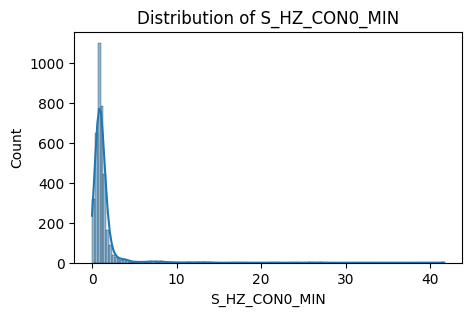

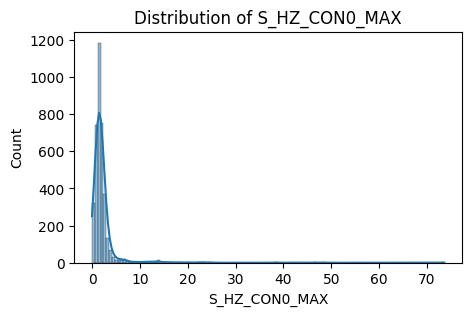

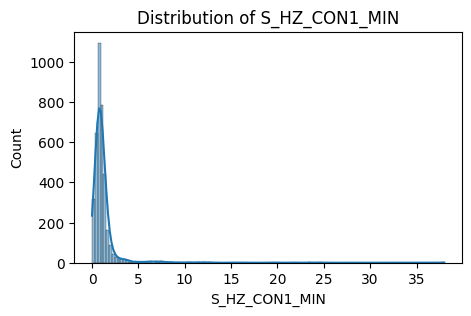

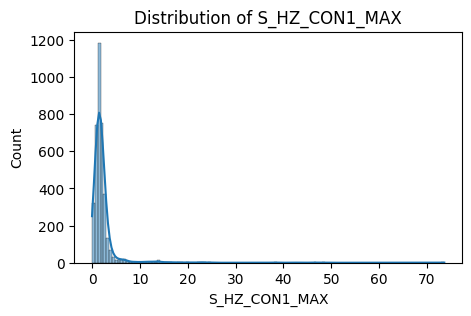

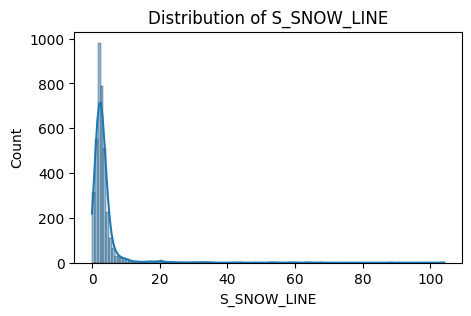

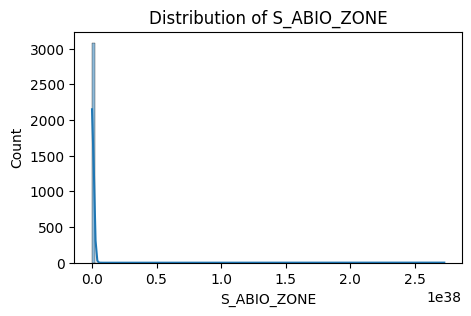

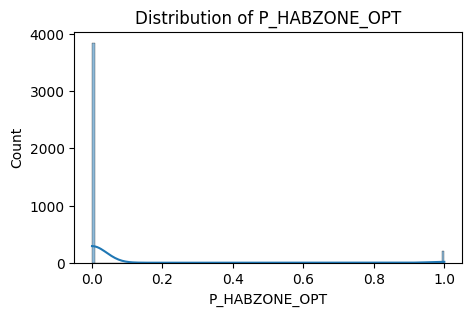

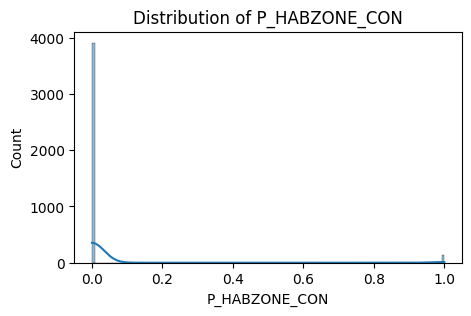

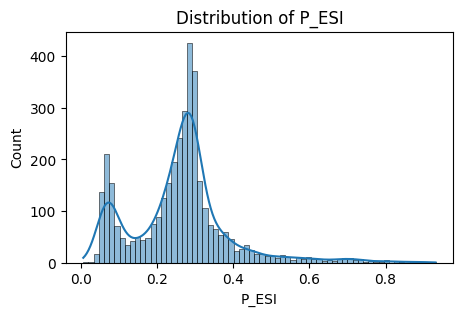

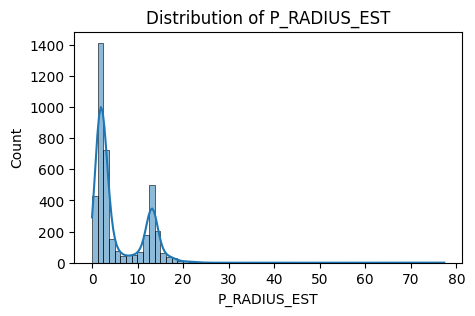

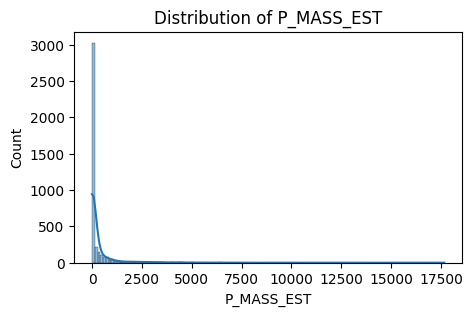

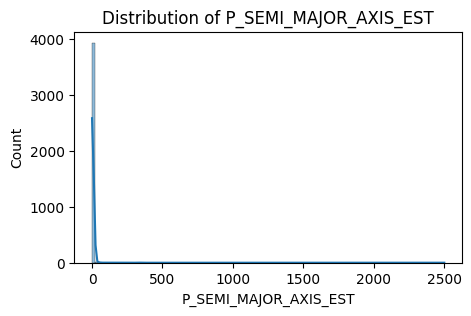

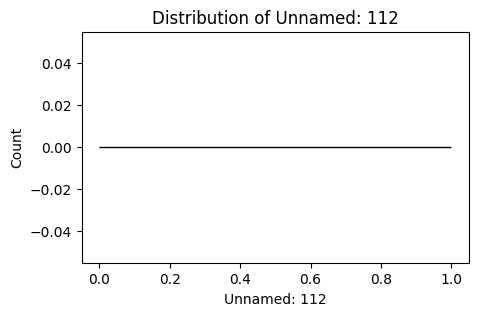

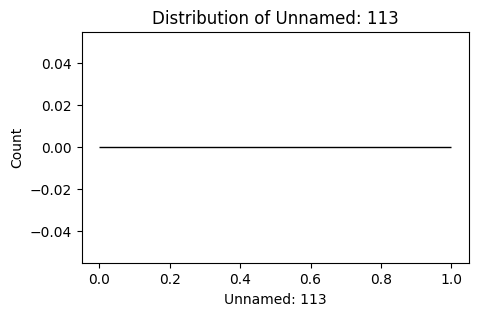

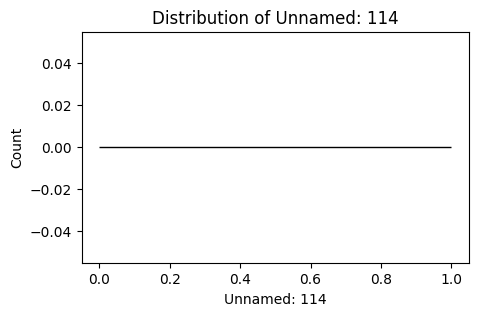

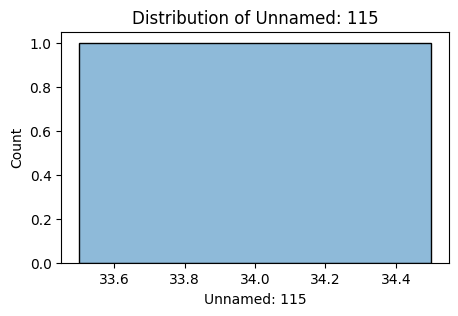

In [12]:
# ===============================
# 6. Distribution Visualization
# ===============================

for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()



=== Skewness of Numeric Features ===


P_PERIOD              62.170001
P_PERIOD_ERROR_MAX    61.467191
P_FLUX_MIN            45.714727
P_FLUX                45.699102
S_MASS_ERROR_MAX      45.649624
                        ...    
S_MAGNETIC_FIELD            NaN
Unnamed: 112                NaN
Unnamed: 113                NaN
Unnamed: 114                NaN
Unnamed: 115                NaN
Length: 100, dtype: float64

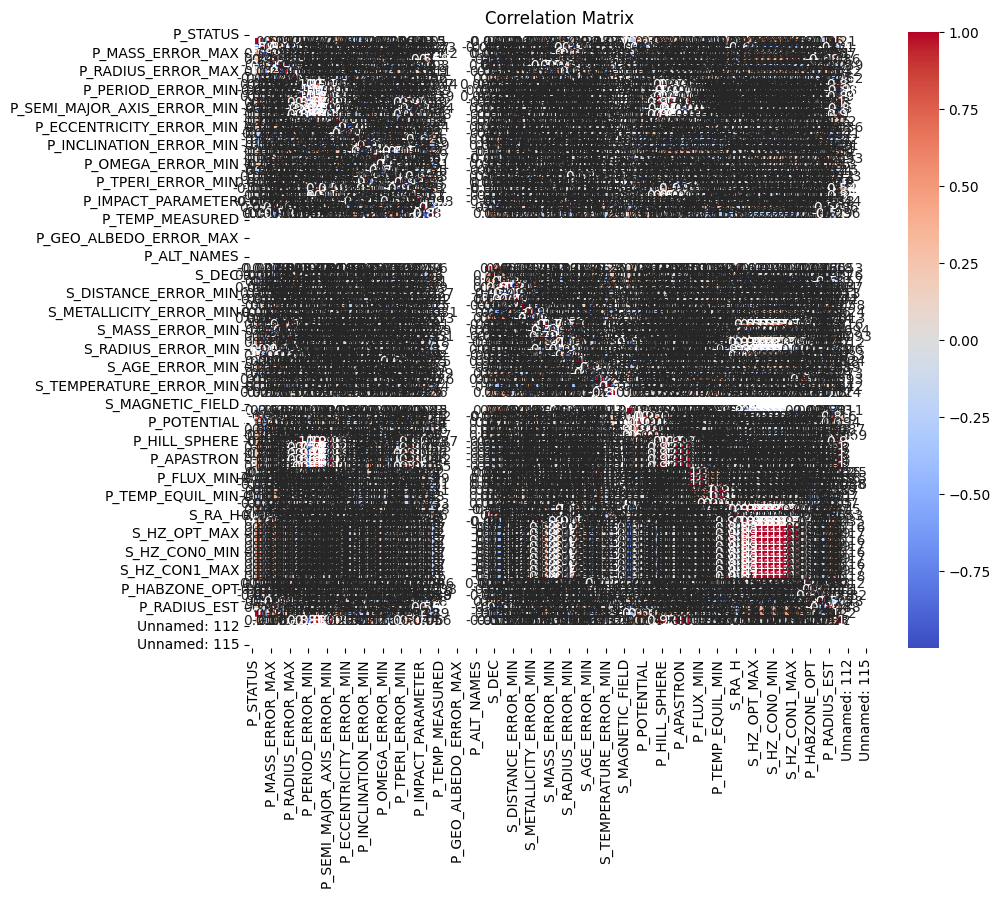

In [13]:
# ===============================
# 7. Skewness & Correlation
# ===============================

# Skewness
skewness = df[num_cols].skew().sort_values(ascending=False)
print("\n=== Skewness of Numeric Features ===")
display(skewness)

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
